In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [5]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Fare_to_Person'] = dataset['Fare'] / dataset['FamilySize']

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Fare_to_Person
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,26.55000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,8.05000


In [6]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Fare_to_Person,Title
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,3.62500,1
1,1,1,1,38.0,PC 17599,71.2833,C85,C,35.64165,3
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,7.92500,2
3,1,1,1,35.0,113803,53.1000,C123,S,26.55000,3
4,0,3,0,35.0,373450,8.0500,NaN,S,8.05000,1


In [7]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Fare_to_Person,Title
0,0,3,0,22,A/5 21171,7.2500,NaN,S,3.62500,1
1,1,1,1,38,PC 17599,71.2833,C85,C,35.64165,3
2,1,3,1,26,STON/O2. 3101282,7.9250,NaN,S,7.92500,2
3,1,1,1,35,113803,53.1000,C123,S,26.55000,3
4,0,3,0,35,373450,8.0500,NaN,S,8.05000,1


In [8]:
for dataset in combine:
    dataset['Age_class.interaction'] = dataset['Age'] * dataset['Pclass']
    dataset['sex_class'] = dataset['Sex'] * dataset['Pclass']
    dataset['age_squared'] = dataset['Age'] ^ 2
    dataset['age_class_squared'] = dataset['Age'] ^ 2
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Fare_to_Person,Title,Age_class.interaction,sex_class,age_squared,age_class_squared
0,0,3,0,22,A/5 21171,7.2500,NaN,S,3.62500,1,66,0,20,20
1,1,1,1,38,PC 17599,71.2833,C85,C,35.64165,3,38,1,36,36
2,1,3,1,26,STON/O2. 3101282,7.9250,NaN,S,7.92500,2,78,3,24,24
3,1,1,1,35,113803,53.1000,C123,S,26.55000,3,35,1,33,33
4,0,3,0,35,373450,8.0500,NaN,S,8.05000,1,105,0,33,33


In [9]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_to_Person,Title,Age_class.interaction,sex_class,age_squared,age_class_squared
0,0,3,0,22,7.2500,S,3.62500,1,66,0,20,20
1,1,1,1,38,71.2833,C,35.64165,3,38,1,36,36
2,1,3,1,26,7.9250,S,7.92500,2,78,3,24,24
3,1,1,1,35,53.1000,S,26.55000,3,35,1,33,33
4,0,3,0,35,8.0500,S,8.05000,1,105,0,33,33


In [10]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_to_Person,Title,Age_class.interaction,sex_class,age_squared,age_class_squared
0,0,3,0,22,7.2500,0,3.62500,1,66,0,20,20
1,1,1,1,38,71.2833,1,35.64165,3,38,1,36,36
2,1,3,1,26,7.9250,0,7.92500,2,78,3,24,24
3,1,1,1,35,53.1000,0,26.55000,3,35,1,33,33
4,0,3,0,35,8.0500,0,8.05000,1,105,0,33,33


In [11]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


# random_forest = RandomForestClassifier(n_estimators=100,max_features=3,min_samples_leaf=50,max_depth=100)
random_forest = RandomForestClassifier(n_estimators=100,oob_score = True, n_jobs = -1,random_state = 50,max_features = "auto",min_samples_leaf = 50)
# random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

80.02

In [12]:
# output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
# output.to_csv('emma_submission.csv', index=False)
# print("Your submission was successfully saved!")

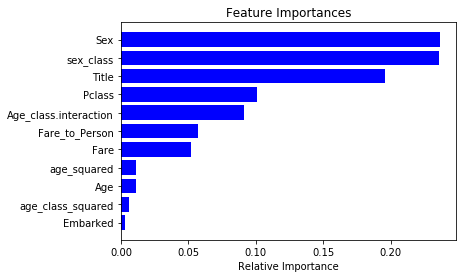

In [16]:
features = train_df.columns.values
features = np.delete(features, np.where(features == "Survived"))
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()